In [ ]:
! pip install kaggle

In [ ]:

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d sanikamal/horses-or-humans-dataset

 99% 304M/307M [00:01<00:00, 191MB/s]
100% 307M/307M [00:01<00:00, 176MB/s]


In [ ]:
! unzip horses-or-humans-dataset.zip

Archive:  horses-or-humans-dataset.zip
  inflating: horse-or-human/horse-or-human/train/horses/horse01-0.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse01-1.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse01-2.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse01-3.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse01-4.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse01-5.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse01-6.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse01-7.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse01-8.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse01-9.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse02-0.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse02-1.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse02-2.png  
  inflating: horse-or-hum

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
os.listdir()

['.config',
 'kaggle.json',
 'horse-or-human',
 'horses-or-humans-dataset.zip',
 'sample_data']

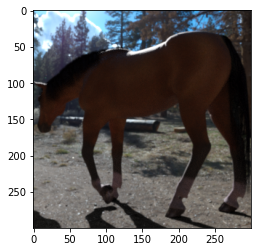

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers,models
validation='/content/horse-or-human/validation'
img_path='/content/horse-or-human/train'
directories=['horses','humans']
for dir in directories:
  path=os.path.join(img_path,dir)
  class_label=directories.index(dir)
  for img in os.listdir(path):
    img_array=cv.imread(os.path.join(path,img))
    colored=cv.cvtColor(img_array,cv.COLOR_BGR2RGB)
    plt.imshow(colored)

    break
  break

In [ ]:
training_data=[]
img_path='/content/horse-or-human/train'
directories=['horses','humans']
def create_training():
  for dir in directories:
    path=os.path.join(img_path,dir)
    class_label=directories.index(dir)
    for img in os.listdir(path):
      img_array=cv.imread(os.path.join(path,img))
      colored=cv.cvtColor(img_array,cv.COLOR_BGR2RGB)
      new_array=cv.resize(colored,(100,100))
      training_data.append([new_array,class_label])
create_training()

In [ ]:
validation_data=[]
img_path='/content/horse-or-human/validation'
directories=['horses','humans']
def create_validation():
  for dir in directories:
    path=os.path.join(img_path,dir)
    class_label=directories.index(dir)
    for img in os.listdir(path):
      img_array=cv.imread(os.path.join(path,img))
      colored=cv.cvtColor(img_array,cv.COLOR_BGR2RGB)
      new_array=cv.resize(colored,(100,100))
      validation_data.append([new_array,class_label])
create_validation()

In [ ]:
import random 
random.shuffle(training_data)

In [ ]:
validation_data

[[array([[[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         ...,
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255

In [ ]:
for sample in validation_data[:3]:
  print(sample[0])

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

In [ ]:
for sample in training_data[:3]:
  print(sample[0])

[[[152 195 252]
  [153 195 252]
  [153 195 253]
  ...
  [171 155 154]
  [166 152 151]
  [166 150 149]]

 [[150 195 252]
  [151 195 251]
  [152 195 252]
  ...
  [175 155 151]
  [166 148 146]
  [162 147 145]]

 [[150 195 252]
  [150 195 251]
  [149 195 252]
  ...
  [171 153 149]
  [156 142 141]
  [158 145 141]]

 ...

 [[216 182 151]
  [216 184 151]
  [219 184 153]
  ...
  [208 181 155]
  [220 189 163]
  [217 186 158]]

 [[224 189 158]
  [218 183 150]
  [217 183 150]
  ...
  [225 193 167]
  [234 201 177]
  [234 202 176]]

 [[221 187 155]
  [222 189 159]
  [228 192 162]
  ...
  [233 202 175]
  [238 205 177]
  [240 205 177]]]
[[[158 175 193]
  [156 174 193]
  [155 174 193]
  ...
  [167 185 202]
  [168 185 203]
  [168 186 203]]

 [[158 177 194]
  [158 176 193]
  [157 175 193]
  ...
  [168 185 203]
  [168 186 204]
  [169 187 204]]

 [[159 177 195]
  [158 177 194]
  [158 176 194]
  ...
  [169 186 205]
  [169 187 205]
  [171 188 206]]

 ...

 [[ 59  51  43]
  [ 75  65  59]
  [ 89  77  70]
  ..

In [ ]:
x=[]
y=[]
for features,labels in training_data:
  x.append(features)
  y.append(labels)
x_test=[]
y_test=[]
for features,labels in validation_data:
  x_test.append(features)
  y_test.append(labels)


In [ ]:
# changing the list to an array
x=np.array(x)
y=np.array(y)
x_test=np.array(x_test)
y_test=np.array(y_test)
print(type(x))
print(type(y))
print(type(x_test))
print(type(y_test))
def shape(x):
  print(x.shape)
shape(y_test)
shape(x_test)
shape(x)
shape(y)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(256,)
(256, 100, 100, 3)
(1027, 100, 100, 3)
(1027,)


In [ ]:
x=x/255
x_test=x_test/255

In [55]:
model=models.Sequential([
                         layers.Conv2D(64,(3,3),activation='relu',input_shape=(100,100,3)),
                         layers.MaxPool2D(3,3),

                         layers.Conv2D(64,(3,3),activation='relu'),
                         layers.MaxPool2D(3,3),

                         layers.Conv2D(64,(3,3),activation='relu'),
                         layers.MaxPool2D(3,3),

                         layers.Flatten(),
                         layers.Dense(500,activation='relu'),
                         layers.Dense(2,activation='softmax')
])

In [59]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)              

In [61]:
hist=model.fit(x=x,y=y,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
33/33 [==============================] - 1s 20ms/step - loss: 0.4216 - accuracy: 0.8130 - val_loss: 0.7667 - val_accuracy: 0.8477
Epoch 2/10
33/33 [==============================] - 0s 15ms/step - loss: 0.1686 - accuracy: 0.9357 - val_loss: 0.7432 - val_accuracy: 0.8594
Epoch 3/10
33/33 [==============================] - 0s 15ms/step - loss: 0.0922 - accuracy: 0.9679 - val_loss: 1.0791 - val_accuracy: 0.8320
Epoch 4/10
33/33 [==============================] - 0s 15ms/step - loss: 0.0480 - accuracy: 0.9854 - val_loss: 1.3917 - val_accuracy: 0.8203
Epoch 5/10
33/33 [==============================] - 0s 15ms/step - loss: 0.0284 - accuracy: 0.9942 - val_loss: 1.0749 - val_accuracy: 0.8438
Epoch 6/10
33/33 [==============================] - 1s 16ms/step - loss: 0.0105 - accuracy: 0.9990 - val_loss: 0.7618 - val_accuracy: 0.8672
Epoch 7/10
33/33 [==============================] - 0s 15ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 1.1945 - val_accuracy: 0.8516
Epoch 8/10
33

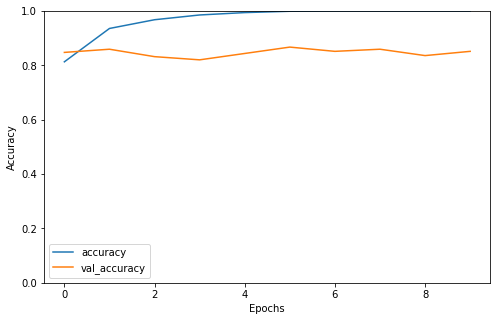

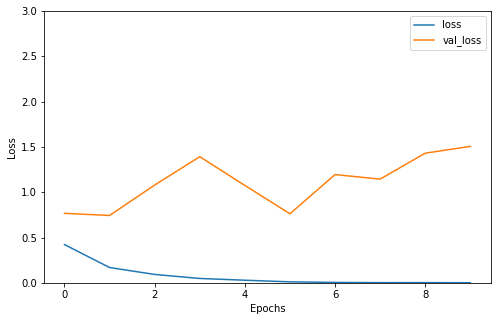

In [67]:
plt.figure(figsize=(8,5))
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'],label='val_accuracy')
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()
plt.figure(figsize=(8,5))
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.ylim(0,3)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()